## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd
import os
from pprint import pp as pprint
import matplotlib.pyplot as plt
import sys

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv('./QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
display(df.head())
display(df.tail())

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
df.shape

(2775, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
df.count()

m                2775
TagName          2775
NumberOfPosts    2775
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [9]:
df.groupby('TagName').sum().sort_values('NumberOfPosts', ascending=False)

,m,NumberOfPosts
TagName,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2531425
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2211815
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919716
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624762
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1467609
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,813878
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,510706
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407657
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,336310


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [11]:
df['m'] = pd.to_datetime(df['m'], format='%Y-%m-%d %H:%M:%S')
df['YearMonth'] = pd.to_datetime(df['m']).dt.to_period('M')
display(df.head())
# Count unique months per language (TagName)
months_per_language = df.groupby('TagName')['YearMonth'].nunique().sort_values(ascending=False)

# Display the result
print("Number of months per language:")
print(months_per_language)

# Find the language(s) with the fewest months
min_months = months_per_language.min()
fewest_months_languages = months_per_language[months_per_language == min_months]

print("\nLanguage(s) with the fewest months of data:")
print(fewest_months_languages)
print(f"Number of months: {min_months}")

df

,m,TagName,NumberOfPosts,YearMonth
0,2008-07-01,c#,3,2008-07
1,2008-08-01,assembly,8,2008-08
2,2008-08-01,c,82,2008-08
3,2008-08-01,c#,503,2008-08
4,2008-08-01,c++,164,2008-08


Number of months per language:
TagName
c#            201
assembly      200
c             200
c++           200
delphi        200
java          200
javascript    200
perl          200
php           200
python        200
ruby          200
r             198
swift         191
go            185
Name: YearMonth, dtype: int64

Language(s) with the fewest months of data:
TagName
go    185
Name: YearMonth, dtype: int64
Number of months: 185


,m,TagName,NumberOfPosts,YearMonth
0,2008-07-01,c#,3,2008-07
1,2008-08-01,assembly,8,2008-08
2,2008-08-01,c,82,2008-08
3,2008-08-01,c#,503,2008-08
4,2008-08-01,c++,164,2008-08
...,...,...,...,...
2770,2025-03-01,php,420,2025-03
2771,2025-03-01,python,2554,2025-03
2772,2025-03-01,r,520,2025-03
2773,2025-03-01,ruby,48,2025-03


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [12]:
df.m = pd.to_datetime(df.m, format='%Y-%m-%d')
display(df.head())

,m,TagName,NumberOfPosts,YearMonth
0,2008-07-01,c#,3,2008-07
1,2008-08-01,assembly,8,2008-08
2,2008-08-01,c,82,2008-08
3,2008-08-01,c#,503,2008-08
4,2008-08-01,c++,164,2008-08


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

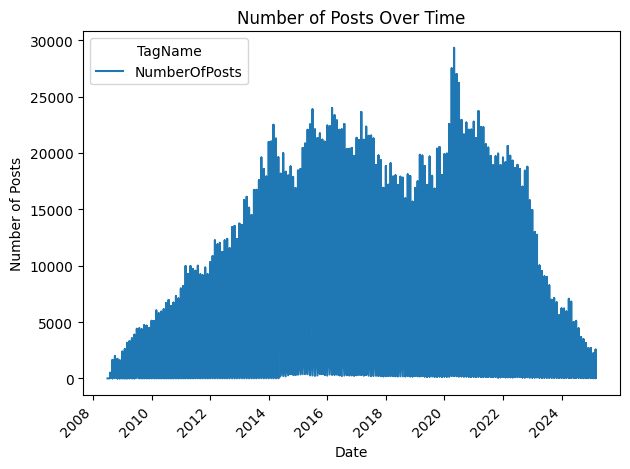

In [ ]:
df_filtered = df[df['TagName'].isin(['python'])]
plot = df.plot(x='m', y='NumberOfPosts', kind='line', title='Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts Over Time')
plt.legend(title='TagName')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 